In [1]:
import sco2es

packed_bed = sco2es.PackedBed.load_case("case.yaml")

In [2]:
t_charge = packed_bed.advance(
    T_inlet=750 + 273,
    P_inlet=27.5e6,
    m_dot_inlet=8.17,
    T_outlet_stop=725 + 273,
    dt=30,
)

In [3]:
import scienceplots
from matplotlib import pyplot as plt
from labellines import labelLine, labelLines

plt.style.use(["science", "notebook", "grid", "bright"])

(0.0, 9.096208333333333)

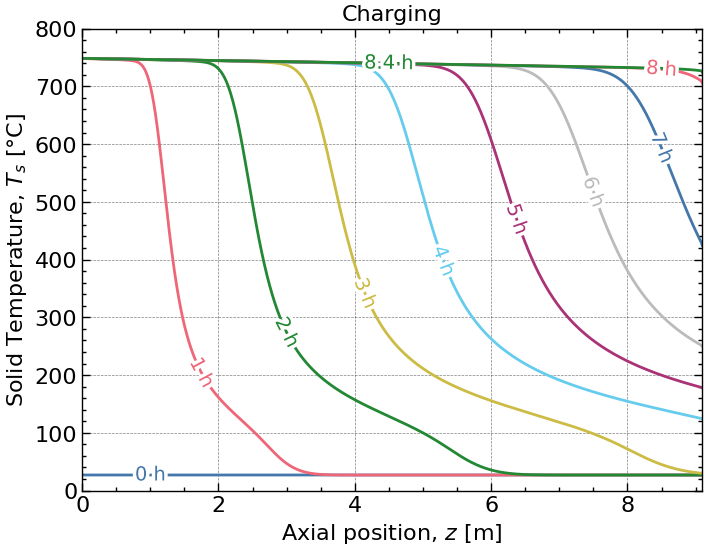

In [4]:
for i in range(int(t_charge / 3600) + 1):
    plt.plot(packed_bed.z, packed_bed.T_s[packed_bed.time_index(h=i)] - 273, label=f"{i} h")

plt.plot(packed_bed.z, packed_bed.T_s[packed_bed.time_index(t_charge)] - 273, label=f"{t_charge / 3600:.1f} h")

labelLines(plt.gca().get_lines(), zorder=2.5, xvals=[1, 1.75, 3, 4.15, 5.3, 6.375, 7.5, 8.5, 8.5, 4.5], fontsize=14)

plt.title("Charging")
plt.ylabel("Solid Temperature, $T_s$ [°C]")
plt.xlabel("Axial position, $z$ [m]")

plt.ylim(0, 800)
plt.xlim(0, max(packed_bed.z))

In [5]:
t_discharge = packed_bed.advance(
    T_inlet=500 + 273,
    P_inlet=27.5e6,
    m_dot_inlet=8.17,
    T_outlet_stop=650 + 273,
    dt=30,
    discharge=True,
)

(0.0, 9.096208333333333)

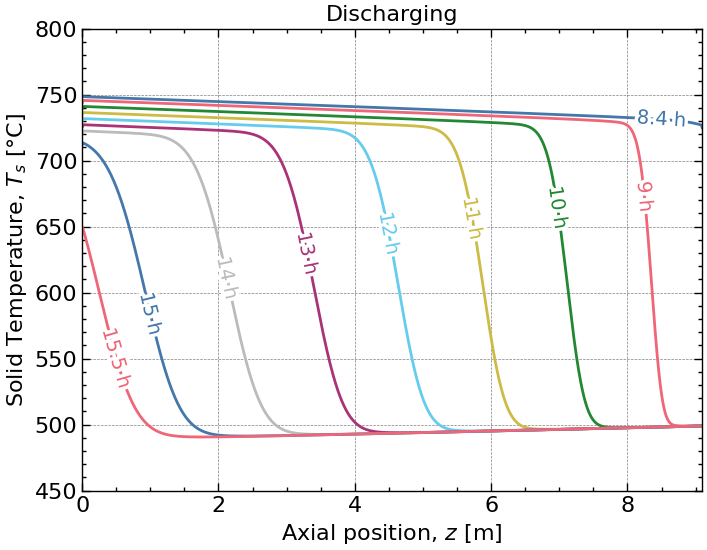

In [6]:
plt.plot(packed_bed.z, packed_bed.T_s[packed_bed.time_index(t_charge)] - 273, label=f"{t_charge / 3600:.1f} h")

for i in range(int(t_charge / 3600) + 1, int(packed_bed.t[-1] / 3600) + 1):
    plt.plot(packed_bed.z, packed_bed.T_s[packed_bed.time_index(h=i)] - 273, label=f"{i} h")

plt.plot(packed_bed.z, packed_bed.T_s[-1] - 273, label=f"{packed_bed.t[-1] / 3600:.1f} h")

labelLines(plt.gca().get_lines(), zorder=2.5, xvals=[8.5, 8.25, 6.975, 5.725, 4.5, 3.3, 2.125, 1, 0.5], fontsize=14)

plt.title("Discharging")
plt.ylabel("Solid Temperature, $T_s$ [°C]")
plt.xlabel("Axial position, $z$ [m]")

plt.ylim(450, 800)
plt.xlim(0, max(packed_bed.z))